In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from skimage.transform import resize
from skimage.color import rgb2gray


In [3]:
csvtrain = '/content/drive/MyDrive/Hopa/Training'

targettrain = []
imagestrain = []
for dir, sub, files in os.walk(csvtrain,topdown=True):
    
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(dir,file)
            csv_file = open(file_path,'r')
            csv_data = csv.reader(csv_file,delimiter=';')
            next(csv_data)
            for line in csv_data:
                img_path = os.path.join(dir,line[0])
                imagestrain.append(cv2.imread(img_path))
                plt.show()
                targettrain.append(line[7])
            csv_file.close()
xtrain = np.array(imagestrain)
ytrain = np.array(targettrain)
#--------------------Test-------------------------
csvtest = '/content/drive/MyDrive/Hopa/Testing'
targettest = []
imagestest = []
for dir, sub, files in os.walk(csvtest,topdown=True):
    
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(dir,file)
            csv_file = open(file_path,'r')
            csv_data = csv.reader(csv_file,delimiter=';')
            next(csv_data)
            for line in csv_data:
                img_path = os.path.join(dir,line[0])
                imagestest.append(cv2.imread(img_path))
                targettest.append(line[7])
            csv_file.close()
xtest = np.asarray(imagestest)
ytest = np.asarray(targettest)
y_test = ytest

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [4]:
resizedimages = []
for image in xtest:
    re = resize(image, (30, 30))
    gray = rgb2gray(re)
    resizedimages.append(gray)
xtest = np.asarray(resizedimages)

In [5]:
resizedimages = []
for image in xtrain:
    re = resize(image, (30, 30))
    gray = rgb2gray(re)
    resizedimages.append(gray)
xtrain = np.asarray(resizedimages)

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
ytrain = labelencoder_X_1.fit_transform(ytrain)

In [7]:
xtrain.shape

(125, 30, 30)

In [8]:
xtr2 = xtrain[:,:,0]
xtr2.shape


(125, 30)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(xtrain[:,:,0])
X_test = sc.transform(xtest[:,:,0])

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
classifier = Sequential()

In [13]:
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='selu', input_dim=30))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='selu'))
classifier.add(Dropout(rate=0.1))

In [15]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [16]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
History = classifier.fit(X_train, ytrain, batch_size=100, epochs=150)

Epoch 1/150
2/2 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5360
Epoch 2/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.8800
Epoch 3/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.8800
Epoch 4/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.8800
Epoch 5/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.8800
Epoch 6/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.8800
Epoch 7/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.8800
Epoch 8/150
2/2 [==============================] - 0s 8ms/step - loss: 0.6798 - accuracy: 0.8800
Epoch 9/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.8560
Epoch 10/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.8560
Epoch 11/150
2/2 [===========

[Epoch:150] Our accuracy is 78.78787878787878%


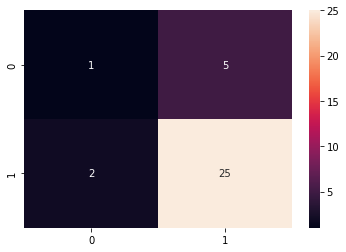

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))


print("[Epoch:150] Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/33)*100))

sns.heatmap(cm,annot=True)
plt.savefig('epoch150.png')

In [21]:
from sklearn.metrics import roc_curve
y_pred = classifier.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test.astype(int), y_pred.astype(int))

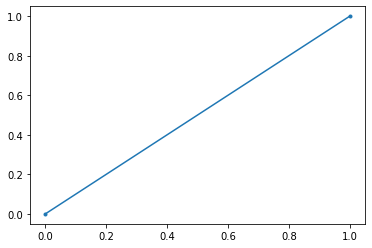

In [29]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot(fpr_keras, tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

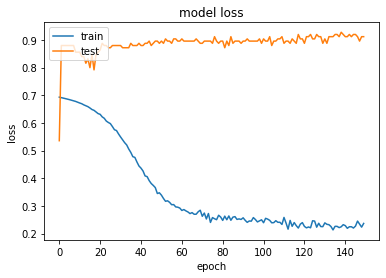

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()